LDA - useful to identify coherent topics

non-negative matrix factorization (NMF) - useful to identify incoherent topics


https://www.freecodecamp.org/news/advanced-topic-modeling-how-to-use-svd-nmf-in-python/


In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import re
from datetime import datetime
import copy
import warnings
warnings.filterwarnings("ignore")
import json

In [ ]:
# used ChatGPT to develop fake addresses for development.

In [67]:
addresses = ['123 Orchard Road, Singapore 238879', '456 Marina Bay Sands, Singapore 018971', '789 Clarke Quay, Singapore 179020', '321 Sentosa Cove, Singapore 098140', 
             '567 Chinatown, Singapore 059672', '890 Little India, Singapore 228851', '234 East Coast Road, Singapore 428949', '876 Bukit Timah, Singapore 589620',
             '543 Jurong West, Singapore 640543', '987 Woodlands Avenue, Singapore 730987', '654 Yishun Street, Singapore 760654', '321 Ang Mo Kio, Singapore 560321', 
             '789 Tampines Central, Singapore 520789', '234 Bedok South, Singapore 469237', '876 Pasir Ris, Singapore 518876', '543 Sembawang Crescent, Singapore 758543',
             '890 Clementi Road, Singapore 129883', '123 Holland Village, Singapore 278326', '456 Queenstown, Singapore 140456', '789 Tanjong Pagar, Singapore 088509', 
             '321 Serangoon Gardens, Singapore 556321', '567 Thomson Road, Singapore 298134', '890 Newton Circus, Singapore 307959', '234 Bishan Street, Singapore 570234', 
             '876 Paya Lebar, Singapore 409376', '543 Sengkang West, Singapore 798543', '987 Punggol Central, Singapore 828987', '654 Hougang Avenue, Singapore 538654', 
             '321 Marine Parade, Singapore 449321', '789 Joo Chiat Road, Singapore 427789']

addresses2 = ['12 Nile Street, Zamalek, Cairo', '34 Pyramids Avenue, Giza, Cairo', '56 Sphinx Road, Mohandessin, Cairo', '78 Pharaohs Street, Maadi, Cairo', '90 Nile View Tower, Garden City, Cairo',
              '23 Nile Delta Plaza, Heliopolis, Cairo', '45 Ramses Square, Downtown, Cairo', '67 Tahrir Street, Dokki, Cairo', '89 Nile Banks Avenue, Agouza, Cairo', 
              '32 Nile River House, Zamalek, Cairo', '54 Cairo Tower View, Giza, Cairo', '76 Sphinx Plaza, Mohandessin, Cairo', '98 Pharaohs Gate, Maadi, Cairo', '21 Nile Gardens, Garden City, Cairo', 
              '43 Nile Palace, Heliopolis, Cairo', '65 Ramses Boulevard, Downtown, Cairo', '87 Tahrir Plaza, Dokki, Cairo', '19 Nile Bridge Road, Agouza, Cairo', 
              '31 Nile Sunset Villa, Zamalek, Cairo', '53 Giza Pyramid Heights, Giza, Cairo', '75 Sphinx Towers, Mohandessin, Cairo', '97 Pharaohs Oasis, Maadi, Cairo', 
              '10 Nile Residence, Garden City, Cairo', '30 Nile Moon Street, Heliopolis, Cairo', '52 Ramses Oasis, Downtown, Cairo', '74 Tahrir Gardens, Dokki, Cairo', 
              '96 Nile Horizon, Agouza, Cairo', '18 Nile Star Tower, Zamalek, Cairo', '40 Giza Sphinx View, Giza, Cairo', '72 Pharaohs Garden, Maadi, Cairo']

addresses3 = ['12 State, Berlin, Germany', '34 Avenue, Berlin, Germany', '56 Run, Berlin, Germany', '78 Fall Street, Berlin, Germany', '90 View Tower, Berlin, Germany',
              '23 Delta, Frankfurt, Germany', '45 North Square, Frankfurt, Germany', '67 Trace Street, Frankfurt, Germany', '89 Banks Avenue, Frankfurt, Germany', 
              '32 River House, Munich, Germany', '54 Tower View, Munich, Germany', '76 Place, Munich, Germany', '98 Gate, Munich, Germany', '21 Grates, Munich, Germany', 
              '43 Palace, Cologne, Germany', '65 South Boulevard, Cologne, Germany', '87 Trader, Cologne, Germany', '19 Bridge Road, Cologne, Germany', 
              '31 Sunset Villa, Cologne, Germany', '53 Heights, Cologne, Germany', '75 Two Towers, Cologne, Germany', '97 Oasis, Cologne, Germany', 
              '10 Residence, Hamburg, Germany', '30 Moon Street, Hamburg, Germany', '52 Overview, Hamburg, Germany', '74 Taki taki, Hamburg, Germany', 
              '96 Horizon, Hamburg, Germany', '18 Star Tower, Stuttgart, Germany', '40 View, Stuttgart, Germany', '72 Great Fall, Stuttgart, Germany']

In [70]:
addresses = addresses + addresses2 + addresses3

In [77]:
### clean 
address_clean = []
#for addr in addresses:
for addr in addresses3:
    
    addr_clean = addr.upper()
    addr_clean = re.sub('STREET|ROAD|AVENUE', '', addr_clean)
    addr_clean = re.sub('[0-9]', '', addr_clean)
    address_clean.append(addr_clean)

address_clean

[' STATE, BERLIN, GERMANY',
 ' , BERLIN, GERMANY',
 ' RUN, BERLIN, GERMANY',
 ' FALL , BERLIN, GERMANY',
 ' VIEW TOWER, BERLIN, GERMANY',
 ' DELTA, FRANKFURT, GERMANY',
 ' NORTH SQUARE, FRANKFURT, GERMANY',
 ' TRACE , FRANKFURT, GERMANY',
 ' BANKS , FRANKFURT, GERMANY',
 ' RIVER HOUSE, MUNICH, GERMANY',
 ' TOWER VIEW, MUNICH, GERMANY',
 ' PLACE, MUNICH, GERMANY',
 ' GATE, MUNICH, GERMANY',
 ' GRATES, MUNICH, GERMANY',
 ' PALACE, COLOGNE, GERMANY',
 ' SOUTH BOULEVARD, COLOGNE, GERMANY',
 ' TRADER, COLOGNE, GERMANY',
 ' BRIDGE , COLOGNE, GERMANY',
 ' SUNSET VILLA, COLOGNE, GERMANY',
 ' HEIGHTS, COLOGNE, GERMANY',
 ' TWO TOWERS, COLOGNE, GERMANY',
 ' OASIS, COLOGNE, GERMANY',
 ' RESIDENCE, HAMBURG, GERMANY',
 ' MOON , HAMBURG, GERMANY',
 ' OVERVIEW, HAMBURG, GERMANY',
 ' TAKI TAKI, HAMBURG, GERMANY',
 ' HORIZON, HAMBURG, GERMANY',
 ' STAR TOWER, STUTTGART, GERMANY',
 ' VIEW, STUTTGART, GERMANY',
 ' GREAT FALL, STUTTGART, GERMANY']

In [ ]:
### run NMF to get topics

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
%pip install --upgrade pip 
%pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.26.2 which is incompatible.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
ydata-profiling 4.1.2 requires tqdm<4.65,>=4.48.2, but you have tqdm 4.66.4 which is inco

In [78]:
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True) 
# under the hood - lowercasing,removing special chars,removing stop words
input_matrix = vectorizer.fit_transform(address_clean).todense() #### use addresses list

In [79]:
svd_modeling= TruncatedSVD(n_components=1, algorithm='randomized', n_iter=100, random_state=122)
svd_modeling.fit(input_matrix)
components=svd_modeling.components_
vocab = vectorizer.get_feature_names()

In [80]:
topic_word_list = []
def get_topics(components): 
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
        print(topic_word_list)
    return topic_word_list
get_topics(components)

['  germany berlin cologne view munich tower hamburg']


['  germany berlin cologne view munich tower hamburg']

In [24]:
## analyze address
### word cloud to visualize


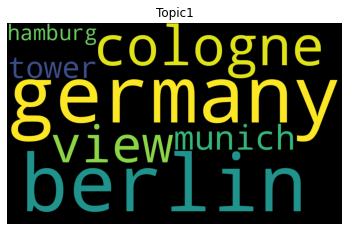

In [81]:
for i in range(1):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

In [ ]:
## analyze info field
### run LDA to get topics


### run NMF to get topics



### word cloud on each topic to visualize



